In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import mapclassify

In [2]:
firms = pd.read_csv('../data/estimation_subset.csv')
firms.head()

,diesel,land_value,total_income,44-45_RCPTOT,72_RCPTOT,num_firms,NAMELSAD
0,-0.790614,-0.848190,-0.247698,-0.333793,-0.245393,2.0,Adelanto city
1,0.314127,0.308894,0.029100,0.326895,0.037790,6.0,Alhambra city
2,-1.020432,0.586952,0.021208,-0.220588,-0.118233,1.0,Aliso Viejo city
3,1.465235,-0.560387,-0.220657,-0.278499,-0.228766,4.0,American Canyon city
4,-1.020432,0.131787,0.996465,1.155069,2.710158,10.0,Anaheim city


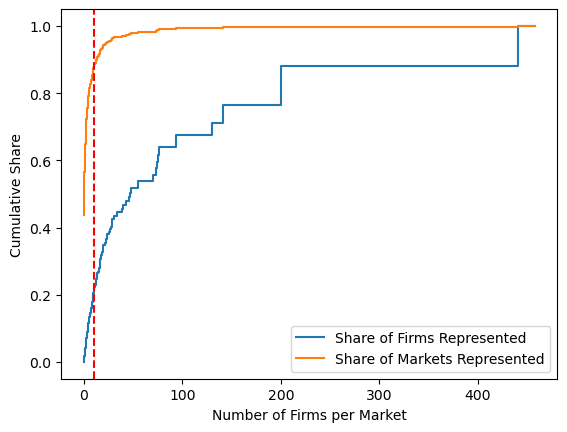

In [4]:
num, count = np.unique(firms.num_firms, return_counts=True)
total_in = num * count
cumulative_sum = [np.sum(total_in[:i + 1]) / np.sum(total_in) for i in range(len(num))]
cumulative_markets = [np.sum(count[:i + 1]) / np.sum(count) for i in range(len(num))]
fig, ax = plt.subplots()
plt.step(num, cumulative_sum, label='Share of Firms Represented')
plt.step(num, cumulative_markets, label='Share of Markets Represented')
ax.legend()
ax.set_ylabel('Cumulative Share')
ax.set_xlabel('Number of Firms per Market')
ax.axvline(10, linestyle='--', color='red')
plt.savefig('../outputs/firm_cumulative_distribution.png', dpi=200)

<Axes: >

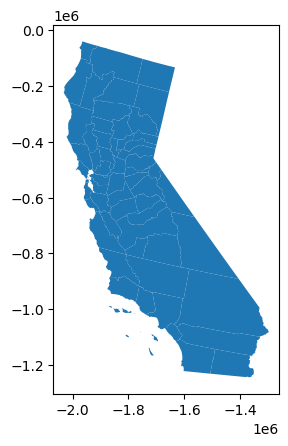

In [2]:
counties = gpd.read_file('../shapes/cb_2018_us_county_500k')
counties = counties[counties.STATEFP == '06']
counties['GEOID'] = counties['GEOID'].astype(int)
counties['coords'] = counties['geometry'].apply(lambda x: x.representative_point().coords[:])
counties['coords'] = [coords[0] for coords in counties['coords']]
counties = counties.to_crs(epsg=2163)
counties.plot()

In [3]:
state_df = gpd.read_file('../shapes/s_22mr22')
state_df = state_df[state_df.STATE.isin(['CA', 'OR', 'NV', 'AZ', 'UT', 'ID'])]
state_df = state_df.to_crs(epsg=2163)
state_df.head()

,STATE,NAME,FIPS,LON,LAT,geometry
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-930864.803 -830120.947, -930577.657..."
5,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-1715617.234 -1167833.849, -17..."
14,ID,Idaho,16,-114.65933,44.38907,"POLYGON ((-1162267.127 562750.724, -1161512.66..."
32,NV,Nevada,32,-116.65539,39.35648,"POLYGON ((-1216425.539 -222952.865, -1215846.1..."
36,OR,Oregon,41,-120.55232,43.93589,"MULTIPOLYGON (((-1965123.392 -38815.668, -1965..."


In [8]:
places = gpd.read_file('../shapes/tl_2019_06_place')
places = places[places.STATEFP == '06']
places = places.to_crs(epsg=2163)
places['GEOID'] = places['GEOID'].astype(int)
places['clean_city'] = [x.lower() for x in places.NAME]
all_places = np.unique(places.clean_city)
places.head()

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,clean_city
0,06,66140,02411785,666140,San Fernando,San Fernando city,25,C1,N,N,G4110,A,6148696,0,+34.2886519,-118.4362413,"POLYGON ((-1686605.942 -1005089.445, -1686409....",san fernando
1,06,14190,02409487,614190,Cloverdale,Cloverdale city,25,C1,N,N,G4110,A,8107251,0,+38.7961433,-123.0150596,"POLYGON ((-1967862.491 -414706.204, -1967836.3...",cloverdale
2,06,16560,02410240,616560,Cotati,Cotati city,25,C1,N,N,G4110,A,4869301,8380,+38.3284920,-122.7100491,"POLYGON ((-1955464.053 -471079.979, -1955452.6...",cotati
3,06,65042,02411779,665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,25,C1,Y,N,G4110,A,56675175,26959120,+34.2677796,-119.2542062,"MULTIPOLYGON (((-1760509.540 -981385.922, -176...",san buenaventura (ventura)
4,06,30014,02410601,630014,Glendora,Glendora city,25,C1,N,N,G4110,A,50527933,400123,+34.1449643,-117.8478035,"POLYGON ((-1638745.067 -1031325.901, -1638735....",glendora


In [23]:
housing = pd.read_csv('../data/land_value_places.csv')
housing['GEOID'] = housing['GEOID'].astype(int)
housing = housing.dropna(subset=['land_value'])
housing.head()

,Unnamed: 0,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,clean_city,land_value,property_value
0,0,6,66140,2411785,666140,San Fernando,San Fernando city,san fernando,231548.140720,548286.584936
1,1,6,14190,2409487,614190,Cloverdale,Cloverdale city,cloverdale,126071.680844,500041.179547
2,2,6,16560,2410240,616560,Cotati,Cotati city,cotati,214775.073148,608872.768112
3,3,6,65042,2411779,665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,san buenaventura (ventura),435396.334013,765548.288950
4,4,6,30014,2410601,630014,Glendora,Glendora city,glendora,386868.488362,683028.285381


In [25]:
gas = pd.read_csv('../data/gas_prices_places.csv')
gas['GEOID'] = gas['GEOID'].astype(int)
gas = gas.dropna(subset='diesel')
gas.head()

,Unnamed: 0,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,clean_city,regular,mid,premium,diesel
0,0,6,66140,2411785,666140,San Fernando,San Fernando city,san fernando,4.6856,4.8792,5.0066,5.5752
1,1,6,14190,2409487,614190,Cloverdale,Cloverdale city,cloverdale,4.7624,4.9706,5.1084,5.6120
2,2,6,16560,2410240,616560,Cotati,Cotati city,cotati,4.7624,4.9706,5.1084,5.6120
3,3,6,65042,2411779,665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,san buenaventura (ventura),4.6866,4.8726,5.0116,5.6680
4,4,6,30014,2410601,630014,Glendora,Glendora city,glendora,4.6856,4.8792,5.0066,5.5752


In [30]:
def my_map_plot(merged, column, label, k=7, cmap='viridis'):
    fig, ax = plt.subplots(1, figsize=(6, 11))
    state_df[state_df.STATE == 'CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=0.8)
    x_low,x_high = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    vmax = np.max(merged[column])
    vmin = np.min(merged[column])
    k = 7
    bounds = np.quantile(merged[column], np.linspace(0,1,k))
    bounds = [round(x,2) for x in bounds]
    print(bounds)
#     k = 7
    ax = merged.plot(column=column, cmap=cmap, linewidth=0.1, ax= ax, edgecolor='0.8', 
               legend=False, scheme='Quantiles', classification_kwds={'k':k})#classification_kwds={'bins':bounds[1:]})
    print(mapclassify.FisherJenks(merged[column], k=k).bins)
    bounds = [vmin]+list(mapclassify.FisherJenks(merged[column], k=k).bins)
    bounds = [round(x,2) for x in bounds]
#     if show_labels:
#         for idx, row in merged.iterrows():
#             plt.annotate(text=row['NAME'], xy=row['coords'],
#                          horizontalalignment='center')

    state_df[state_df.STATE != 'CA'].plot(ax=ax, color="#E2E2E2", edgecolor='#727475')
    counties.plot(ax=ax, color='none',edgecolor='black', linewidth=0.8)

    ax.set_xlim((x_low, x_high))
    ax.set_ylim((y_low, y_high))
    ax.axis('off')
    cax = ax.inset_axes([0.1, -0.06, 0.8, 0.05])
    cmap = mpl.colormaps[cmap]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,
                 cax=cax, orientation='horizontal', pad=0)  
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label=label, fontsize=13, labelpad=-75)
    return ax, plt


[11400.0, 40188.35, 62438.68, 122277.13, 250578.28, 486600.0, 3649655.27]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/mapclassify/classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


[ 163948.49883733  402401.63429204  735017.45514543 1181200.
 1655135.91248217 2246979.92999103 3649655.273384  ]


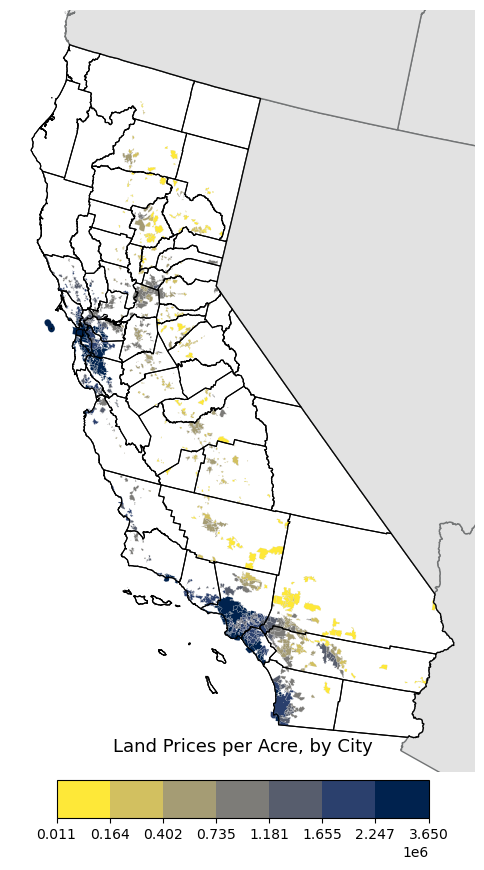

In [33]:
merged = places.merge(housing, on=['GEOID'], how='right')
ax, plt = my_map_plot(merged, column='land_value', label='Land Prices per Acre, by City', cmap='cividis_r')

[5.25, 5.44, 5.47, 5.54, 5.6, 5.63, 5.82]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/mapclassify/classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


[5.328      5.48614174 5.5364     5.57520626 5.64519903 5.7104
 5.82      ]


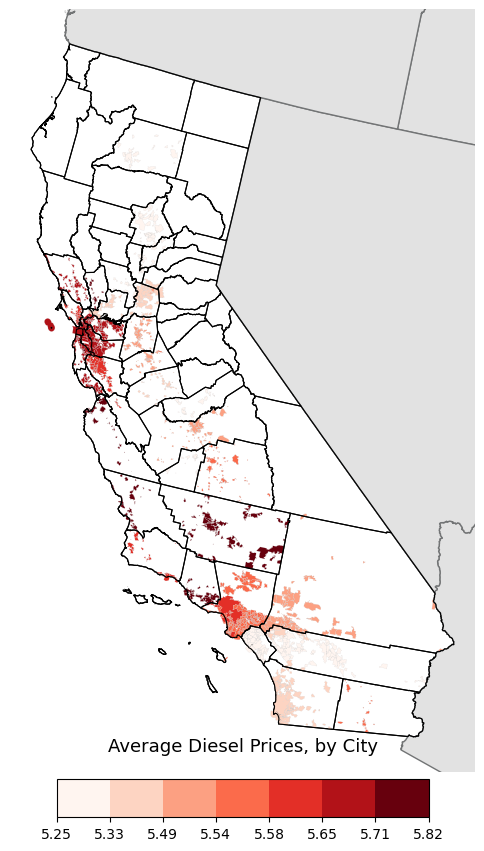

In [34]:
merged = places.merge(gas, on=['GEOID'], how='right')
ax, plt = my_map_plot(merged, column='diesel', label='Average Diesel Prices, by City', cmap='Reds')